In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
from rHeston import roughHeston

## rough Heston

In [2]:
%%time
# Heston parameters
rho, kappa,theta,nu,V0, alpha = -0.7, 0.3, 0.02, 0.3, 0.01, 0.6
S0, T = 1., 1.0/12
Nsteps, upLim = 200, 50.

heston_params = {'kappa': kappa, 'nu': nu, 'alpha': alpha, 'rho': rho, 'V0': V0, 'theta': theta, 'S0': S0}
he = roughHeston(Nsteps, heston_params, T)

j = complex(0,1)
temp = he.rHeston_char_function(-0.01*j)
print(temp)
print(np.real(temp))

(0.999995699070562+0j)
0.999995699070562
CPU times: user 208 ms, sys: 0 ns, total: 208 ms
Wall time: 208 ms


In [3]:
def MgF_rough_Heston(u,S0,T,rho,kappa,theta,nu,V0,alpha,M):
    '''
    kappa here means lamb
    '''
    heston_params = {'kappa': kappa, 'nu': nu, 'alpha': alpha, 'rho': rho, 'V0': V0, 'theta': theta, 'S0': S0}
    he = roughHeston(M, heston_params, T)
    
    j = complex(0,1)
    res = he.rHeston_char_function(-u*j)
    return np.real(res)

def grad_mgf(eps, S0,T,rho,kappa,theta,nu,V0,alpha,M):
    if(eps>0.01):
        eps = 0.01
    y2 = MgF_rough_Heston(eps,S0,T,rho,kappa,theta,nu,V0,alpha,M)
    y1 = MgF_rough_Heston(0.0,S0,T,rho,kappa,theta,nu,V0,alpha,M)
    return (y2-y1)/eps

def mgf_VIX(eps, S0,T,rho,kappa,theta,nu,V0,alpha,M):
    if(S0!=1.0):
        S0 = 1.0
    term1 = grad_mgf(eps, S0,T,rho,kappa,theta,nu,V0,alpha,M)
    VIX2 = -2/T * term1 * 100**2
    VIX = np.sqrt(VIX2)
    return VIX

In [4]:
%%time 
T = 1/12
mgf_VIX(0.0001, S0,T,rho,kappa,theta,nu,V0,alpha,2000)

CPU times: user 39.9 s, sys: 24.6 ms, total: 39.9 s
Wall time: 39.9 s


10.2229425351705

6it [1:41:24, 1014.02s/it]

CPU times: user 1h 41min 3s, sys: 7.57 s, total: 1h 41min 10s
Wall time: 1h 41min 24s


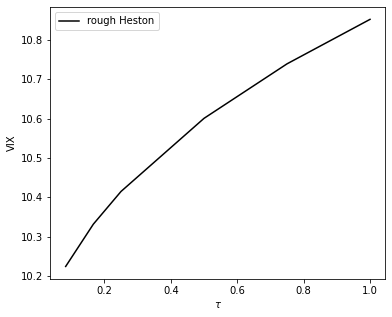

In [11]:
%%time
tau_ = np.array([1/12,2/12,3/12,6/12,9/12,12/12])
VIX_rH = np.zeros_like(tau_)
for idx,tau_i in tqdm(enumerate(tau_)):
    VIX_rH[idx] = mgf_VIX(0.0001/2, 1,tau_i,rho,kappa,theta,nu,V0,alpha,10000)
    
plt.figure(figsize=(6,5))
plt.plot(tau_,VIX_rH,color='black',label='rough Heston')
plt.xlabel('$\\tau$')
plt.ylabel('VIX')
plt.legend()
# plt.savefig('results/VIX_ts_by_rMGF.eps',dpi=400)

## lifted Heston

In [12]:
tau_ = np.array([1/12,2/12,3/12,6/12,9/12,12/12])

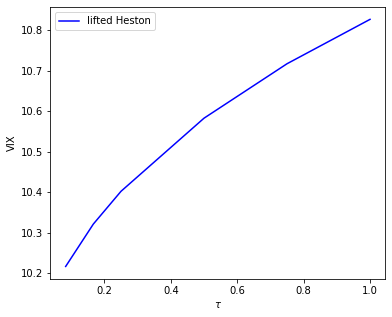

In [13]:
## import from LHestonMGF.ipynb
VIX_lH = np.array([10.21634495, 10.3210765 , 10.40201612, 10.58268611, 10.71719163, 10.82687594])
plt.figure(figsize=(6,5))
plt.plot(tau_,VIX_lH,color='blue',label='lifted Heston')
plt.xlabel('$\\tau$')
plt.ylabel('VIX')
plt.legend()
# plt.savefig('results/VIX_ts_by_lMGF.eps',dpi=600)

## explicit formula

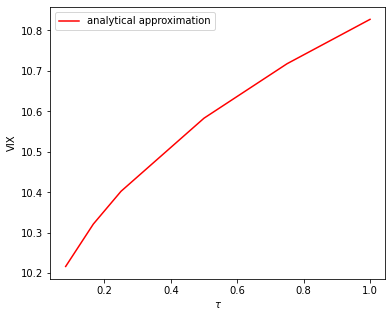

In [14]:
## import from LHestonAnalytic.ipynb
VIX_analytical = np.array([10.21686562, 10.32160831, 10.40255711, 10.58324969, 10.71777409, 10.8274753])
plt.figure(figsize=(6,5))
plt.plot(tau_,VIX_analytical,color='red',label='analytical approximation')
plt.xlabel('$\\tau$')
plt.ylabel('VIX')
plt.legend()
# plt.savefig('results/VIX_ts_by_analytical.eps',dpi=600)

## combine

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


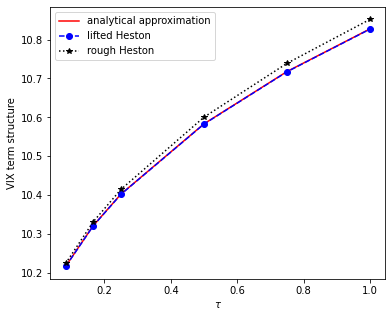

In [15]:
plt.figure(figsize=(6,5))
plt.plot(tau_,VIX_analytical,color='red',label='analytical approximation')
plt.plot(tau_,VIX_lH,color='blue',linestyle='dashed', marker='o',label='lifted Heston')
plt.plot(tau_,VIX_rH,color='black', linestyle='dotted', marker='*',label='rough Heston')
plt.xlabel('$\\tau$')
plt.ylabel('VIX term structure')
plt.legend()
plt.savefig('results/VIX_ts_by_compare1.eps',dpi=400)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


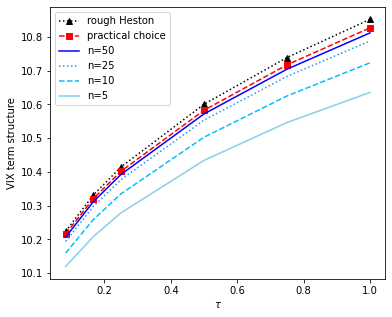

In [16]:
## import from LHestonMGF.ipynb
VIX_mgf_5f  = np.array([10.11991973, 10.20843272, 10.2787935,  10.43409827, 10.54639411, 10.6355185 ])
VIX_mgf_10f = np.array([10.15962916, 10.25875854, 10.33507298, 10.50281782, 10.62514282, 10.72329926])
VIX_mgf_25f = np.array([10.19398294, 10.29769842, 10.37732518, 10.55337165, 10.68299717, 10.78785135])
VIX_mgf_50f = np.array([10.20679981, 10.31181614, 10.39260847, 10.57185946, 10.70439821, 10.81194283])

plt.figure(figsize=(6,5))
plt.plot(tau_,VIX_rH,color='black', linestyle='dotted', marker='^',label='rough Heston')
plt.plot(tau_,VIX_lH,color='red',linestyle='dashed', marker='s',label='practical choice')
plt.plot(tau_,VIX_mgf_50f,color='blue',label='n=50')
plt.plot(tau_,VIX_mgf_25f,color='dodgerblue',linestyle='dotted',label='n=25')
plt.plot(tau_,VIX_mgf_10f,color='deepskyblue',linestyle='dashed',label='n=10')
plt.plot(tau_,VIX_mgf_5f, color='skyblue',label='n=5')

plt.xlabel('$\\tau$')
plt.ylabel('VIX term structure')
plt.legend()
plt.savefig('results/VIX_ts_by_compare2.eps',dpi=600)